# Classificação com SVM em Python

In [52]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA

## Carregando dados

In [2]:
df = pd.read_csv('/content/Credit.csv')

## Exploração de dados

In [3]:
# primeiras linhas
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
# ultimas linhas
df.tail()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad
999,0<=X<200,45,'critical/other existing credit','used car',4576,100<=X<500,unemployed,3,'male single',none,...,car,27,none,own,1,skilled,1,none,yes,good


In [5]:
# dimensoes do dataset
df.shape

(1000, 21)

In [6]:
# informaçoes gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [7]:
# atributos
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [8]:
# confirmando nao nulos
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


## Análises descritivas

In [10]:
# atributos numericos
df.select_dtypes(include='number').columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

In [11]:
# atributos categoricos
df.select_dtypes(include='object').columns

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [9]:
# analise de dados numericos
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [13]:
# analise de dados categoricos
df.describe(include='object').T

,count,unique,top,freq
checking_status,1000,4,'no checking',394
credit_history,1000,5,'existing paid',530
purpose,1000,10,radio/tv,280
savings_status,1000,5,<100,603
employment,1000,5,1<=X<4,339
personal_status,1000,4,'male single',548
other_parties,1000,3,none,907
property_magnitude,1000,4,car,332
other_payment_plans,1000,3,none,814
housing,1000,3,own,713


In [17]:
# valores unicos categoricos
for col in df.select_dtypes(include='object').columns:
    print(f'{col}: {df[col].unique()}\n\n')

checking_status: ['<0' '0<=X<200' "'no checking'" '>=200']


credit_history: ["'critical/other existing credit'" "'existing paid'"
 "'delayed previously'" "'no credits/all paid'" "'all paid'"]


purpose: ['radio/tv' 'education' 'furniture/equipment' "'new car'" "'used car'"
 'business' "'domestic appliance'" 'repairs' 'other' 'retraining']


savings_status: ["'no known savings'" '<100' '500<=X<1000' '>=1000' '100<=X<500']


employment: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']


personal_status: ["'male single'" "'female div/dep/mar'" "'male div/sep'" "'male mar/wid'"]


other_parties: ['none' 'guarantor' "'co applicant'"]


property_magnitude: ["'real estate'" "'life insurance'" "'no known property'" 'car']


other_payment_plans: ['none' 'bank' 'stores']


housing: ['own' "'for free'" 'rent']


job: ['skilled' "'unskilled resident'" "'high qualif/self emp/mgmt'"
 "'unemp/unskilled non res'"]


own_telephone: ['yes' 'none']


foreign_worker: ['yes' 'no']


class: ['good' 'bad']




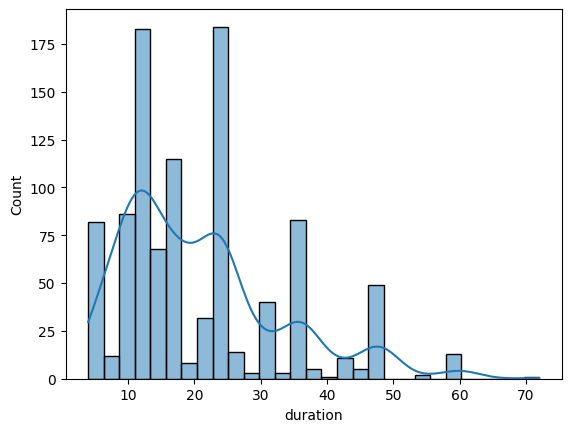

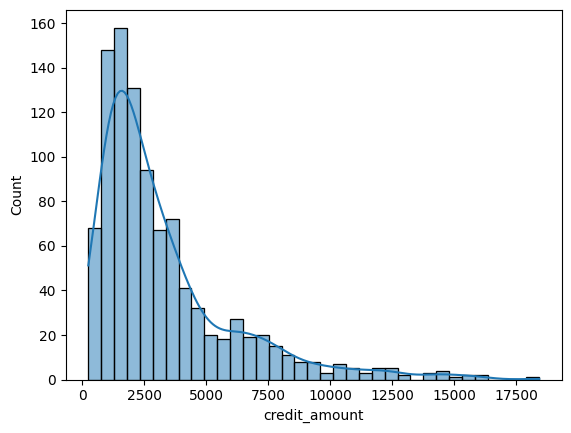

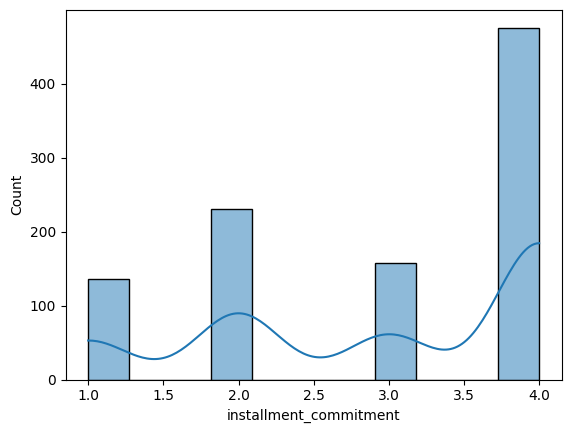

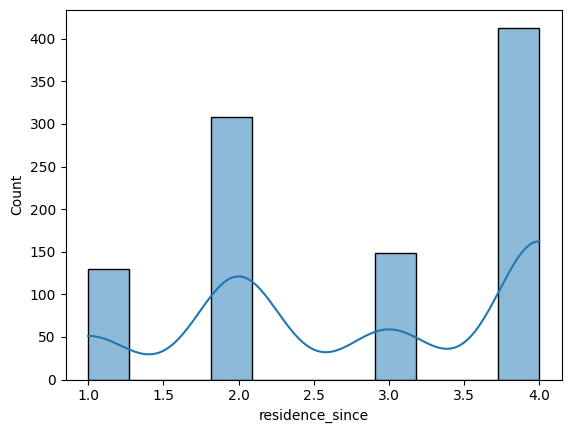

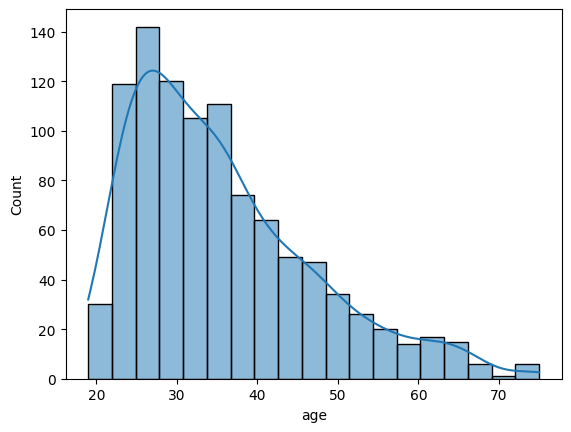

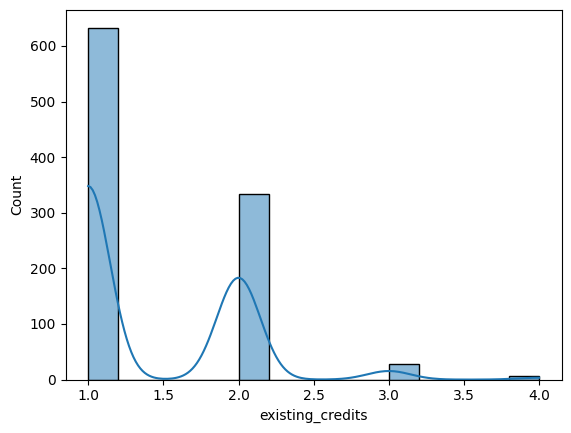

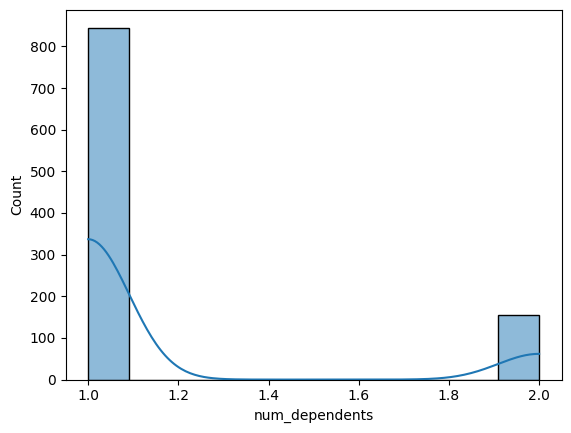

In [21]:
# distribuição de atributos discretos
for col in df.select_dtypes(include='number').columns:
    sns.histplot(df[col], kde=True);
    plt.show()

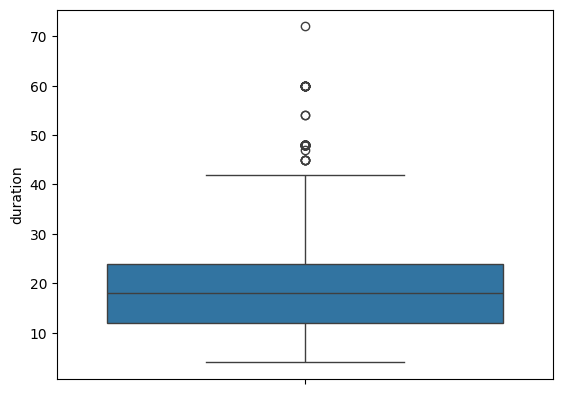

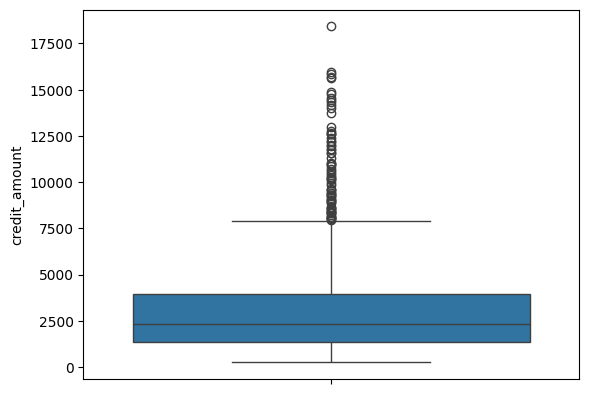

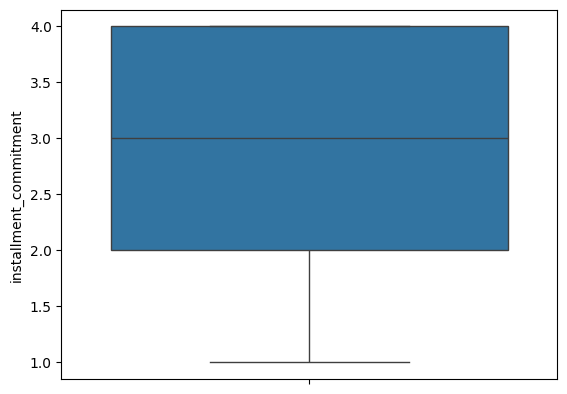

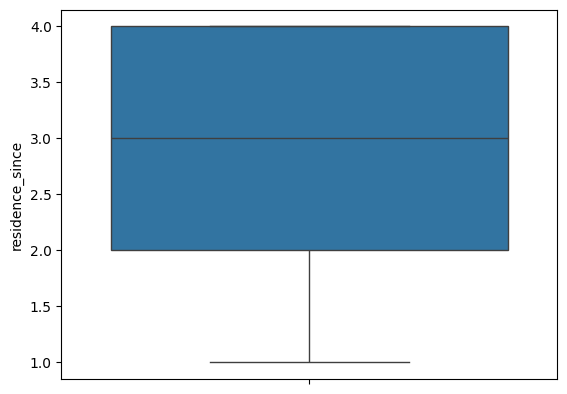

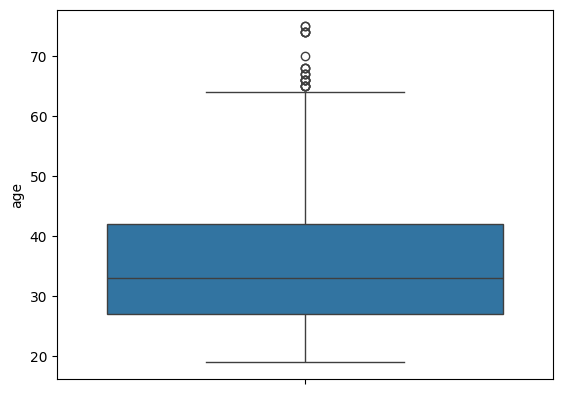

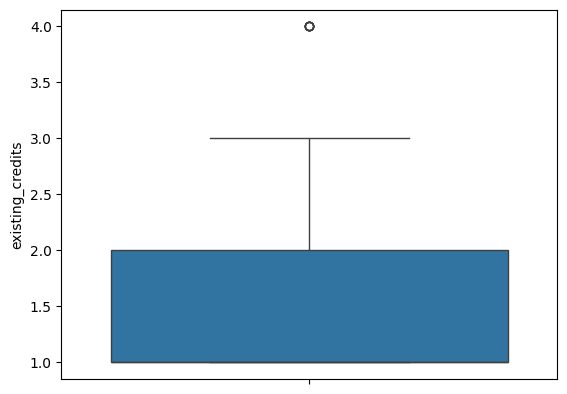

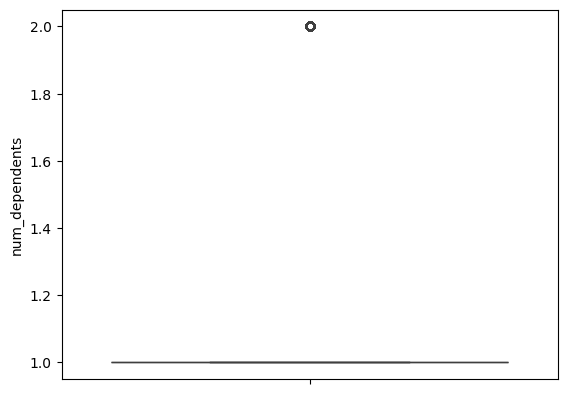

In [22]:
# outliers
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(df[col]);
    plt.show()

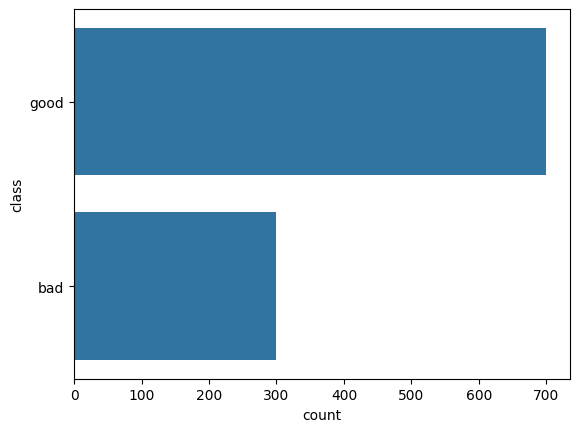

In [23]:
# atributo alvo
sns.countplot(df['class']);

## Preprocessamento e Modelagem


In [31]:
# separando atributos
X = df.drop('class', axis=1)
y = df['class']

In [44]:
# encoding
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include='object').columns)

In [35]:
# bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 61), (300, 61), (700,), (300,))

In [45]:
# padronizacao
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SVM sem PCA

In [46]:
# treinando modelo svm
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [47]:
# previsoes
y_pred = svm.predict(X_test_scaled)

### SVM com PCA

In [59]:
# selecionando 5 atributos principais
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [60]:
# modelo com pca
svm2 = SVC()
svm2.fit(X_train_pca, y_train)

SVC()

In [61]:
# previsoes com pca
y_pred2 = svm2.predict(X_test_pca)

### SVM com PCA e ajuste de pesos

In [63]:
# modelo com ajuste de pesos
svm3 = SVC(class_weight='balanced')
svm3.fit(X_train_pca, y_train)

SVC(class_weight='balanced')

In [64]:
# previsoes
y_pred3 = svm3.predict(X_test_pca)

## Avaliações de modelos

In [66]:
# relatorio do modelo sem PCA
print("Relatório: SVM\n\n")
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f'Confusion Matrix:\n{cm}\n\nClassification Report:\n{cr}\n\nAccuracy Score: {acc}')

Relatório: SVM


Confusion Matrix:
[[ 31  60]
 [ 12 197]]

Classification Report:
              precision    recall  f1-score   support

         bad       0.72      0.34      0.46        91
        good       0.77      0.94      0.85       209

    accuracy                           0.76       300
   macro avg       0.74      0.64      0.65       300
weighted avg       0.75      0.76      0.73       300


Accuracy Score: 0.76


In [67]:
# relatorio do modelo com PCA
print("Relatório: SVM com PCA\n\n")
cm2 = confusion_matrix(y_test, y_pred2)
cr2 = classification_report(y_test, y_pred2)
acc2 = accuracy_score(y_test, y_pred2)

print(f'Confusion Matrix:\n{cm2}\n\nClassification Report:\n{cr2}\n\nAccuracy Score: {acc2}')

Relatório: SVM com PCA


Confusion Matrix:
[[ 32  59]
 [ 22 187]]

Classification Report:
              precision    recall  f1-score   support

         bad       0.59      0.35      0.44        91
        good       0.76      0.89      0.82       209

    accuracy                           0.73       300
   macro avg       0.68      0.62      0.63       300
weighted avg       0.71      0.73      0.71       300


Accuracy Score: 0.73


In [65]:
# relatorio modelo com PCA e ajuste de pesos
print("Relatório: SVM com PCA e ajuste de pesos\n\n")
cm3 = confusion_matrix(y_test, y_pred3)
cr3 = classification_report(y_test, y_pred3)
acc3 = accuracy_score(y_test, y_pred3)

print(f'Confusion Matrix:\n{cm3}\n\nClassification Report:\n{cr3}\n\nAccuracy Score: {acc3}')



Relatório: SVM com PCA e ajuste de pesos


Confusion Matrix:
[[ 62  29]
 [ 68 141]]

Classification Report:
              precision    recall  f1-score   support

         bad       0.48      0.68      0.56        91
        good       0.83      0.67      0.74       209

    accuracy                           0.68       300
   macro avg       0.65      0.68      0.65       300
weighted avg       0.72      0.68      0.69       300


Accuracy Score: 0.6766666666666666
